# **CALIDAD DE DATOS**
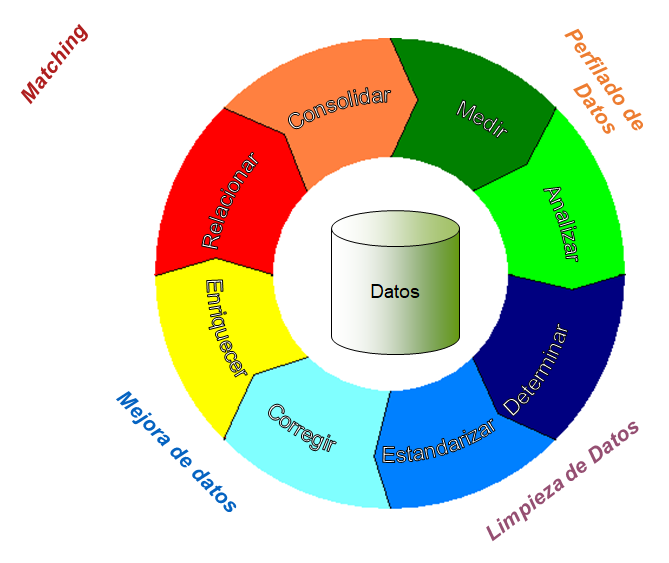


## PERFILADO DE DATOS

### Descripción del Dataset
**danceability:**
La bailabilidad describe la idoneidad de una pista para bailar según una combinación de elementos musicales, como el tempo, la estabilidad rítmica, la intensidad del compás y la regularidad general. Un valor de 0.0 es el menos bailable y 1.0 el más bailable.


**energy:**
La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Normalmente, las pistas energéticas se perciben rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptuales que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la velocidad de inicio y la entropía general.


**key:**
La tonalidad de la pista. Los números enteros se asignan a alturas mediante la notación estándar de clases de altura. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente.


**loudness:**
La sonoridad general de una pista en decibelios (dB). Los valores de sonoridad se promedian a lo largo de toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la calidad del sonido, el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 dB.

**mode:**
El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor se representa con 1 y menor con 0.

**speechiness:**
Speechiness detecta la presencia de palabras habladas en una pista.

**acousticness:**
Una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1,0 representa una confianza alta de que la pista es acústica.

**instrumentalness:**
Predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran instrumentales en este contexto.

**liveness:**
Detecta la presencia de una audiencia en la grabación.

**valence:**
Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista.

**tempo:**
El tempo general estimado de una pista en pulsaciones por minuto (BPM)

**duration_ms:**
La duración de la pista en milisegundos.

**time_signature:**
Un compás general estimado de una pista.

**liked:**
1 para canciones que me gustan, 0 para canciones que no me gustan

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
# Se cargan los datos
data=pd.read_csv('spotify_raw.csv', sep=',')
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


Los valores de **Key**, **Mode**, **Time Signature** y **Liked** deben ser convertidos a categóricos ya que aunque se representan en números, solo pueden tener ciertos valores en concreto.

In [4]:
# Corrección de tipos de datos
data['key']=data['key'].astype('category')
data['mode']=data['mode'].astype('category')
data['time_signature']=data['time_signature'].astype('category')
data['liked']=data['liked'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      195 non-null    float64 
 1   energy            195 non-null    float64 
 2   key               195 non-null    category
 3   loudness          195 non-null    float64 
 4   mode              195 non-null    category
 5   speechiness       195 non-null    float64 
 6   acousticness      195 non-null    float64 
 7   instrumentalness  195 non-null    float64 
 8   liveness          195 non-null    float64 
 9   valence           195 non-null    float64 
 10  tempo             195 non-null    float64 
 11  duration_ms       195 non-null    int64   
 12  time_signature    195 non-null    category
 13  liked             195 non-null    category
dtypes: category(4), float64(9), int64(1)
memory usage: 17.0 KB


In [5]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=852d7b4a649476d4416c9fbb6017729b27aec1019ad7c111e2772d7054808376
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
# Cargar librería para Profiling
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 56.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Dimensiones de la Calidad de Datos**

**Completitud:** ¿Está toda la información disponible? ¿Hay datos faltantes o ausentes?

**Exactitud:**¿La información es correcta y libre de error?

**Conformidad:** ¿Los valores de los datos están conformes con los formatos esperados? Ejemplo: Una fecha en formato AAAA/MM/DD cuando debería ser DD/MM/AAAA.

**Oportunidad:** ¿La información llega cuando se necesita?

**Duplicidad:** ¿Existen múltiples instancias, innecesarias de los mismos objetos de datos en el conjunto de datos?

**Integridad:** ¿Faltan datos relacionados importantes? ¿Es clara la conectividad y las relaciones con otros datos?

# **Diagnóstico de las dimensiones según el perfilado:**
* **Completitud:**  Alta completitud, No hay valores nulos o faltantes

* **Exactitud:** No hay indicios de errores formales (e.g., valores negativos incorrectos)

* **Conformidad:** Alta conformidad, Los formatos son coherentes

* **Oportunidad:** No evaluable

* **Duplicidad:** Sin duplicados

* **Integridad:**  Moderada (estructuralmente completa, pero con desequilibrios), No hay claves faltantes, pero hay alta correlación entre muchas variables, y desequilibrio en time_signature y instrumentalness (40% ceros), lo cual puede afectar la consistencia de relaciones internas.

# **B. LIMPIEZA  DE LOS DATOS**
1. Detección de duplicados
2. Selección de datos
3. Limpieza de atípicos
4. Limpieza de nulos



**1. Detección de duplicados**

In [9]:
# 1. Detección y eliminación de duplicados
print("Duplicados antes de eliminar:", data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicados después de eliminar:", data.duplicated().sum())

Duplicados antes de eliminar: 0
Duplicados después de eliminar: 0


**2. Selección de Datos**

In [10]:
columnas_seleccionadas = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'liked'
]

data = data[columnas_seleccionadas]

**3. Limpieza de datos atípicos: se asigna nulo**

In [11]:
# Función para detectar y reemplazar outliers con NaN usando IQR
def limpiar_outliers_IQR(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = (df[col] < limite_inferior) | (df[col] > limite_superior)
        print(f"{col}: {outliers.sum()} valores atípicos encontrados")

        # Reemplazar los outliers con NaN
        df.loc[outliers, col] = np.nan
    return df

# Lista de columnas numéricas a limpiar
columnas_numericas = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Aplicar la limpieza
data = limpiar_outliers_IQR(data, columnas_numericas)

# Verificación rápida
print("\nCantidad de valores nulos después de limpiar outliers:")
print(data.isna().sum())


danceability: 0 valores atípicos encontrados
energy: 15 valores atípicos encontrados
loudness: 20 valores atípicos encontrados
speechiness: 3 valores atípicos encontrados
acousticness: 0 valores atípicos encontrados
instrumentalness: 48 valores atípicos encontrados
liveness: 23 valores atípicos encontrados
valence: 0 valores atípicos encontrados
tempo: 0 valores atípicos encontrados
duration_ms: 9 valores atípicos encontrados

Cantidad de valores nulos después de limpiar outliers:
danceability         0
energy              15
loudness            20
speechiness          3
acousticness         0
instrumentalness    48
liveness            23
valence              0
tempo                0
duration_ms          9
liked                0
dtype: int64


**4. Limpieza de datos nulos: Imputación**

In [12]:
from sklearn.impute import SimpleImputer


# Lista de columnas numéricas (excluyendo 'liked', que es la variable objetivo)
columnas_numericas = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Imputación de nulos con la media
imp_media = SimpleImputer(missing_values=np.nan, strategy='mean')
data[columnas_numericas] = imp_media.fit_transform(data[columnas_numericas])

# Verificación
print("Resumen del DataFrame después de imputar:")
print(data.info())



Resumen del DataFrame después de imputar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      195 non-null    float64 
 1   energy            195 non-null    float64 
 2   loudness          195 non-null    float64 
 3   speechiness       195 non-null    float64 
 4   acousticness      195 non-null    float64 
 5   instrumentalness  195 non-null    float64 
 6   liveness          195 non-null    float64 
 7   valence           195 non-null    float64 
 8   tempo             195 non-null    float64 
 9   duration_ms       195 non-null    float64 
 10  liked             195 non-null    category
dtypes: category(1), float64(10)
memory usage: 15.7 KB
None


In [13]:
# Mostrar los valores (medias) usados para imputar cada columna numérica
print("Valores de imputación (media) para cada variable numérica:")
print(imp_media.statistics_)


Valores de imputación (media) para cada variable numérica:
[ 6.36656410e-01  6.88480556e-01 -7.58488000e+00  1.43092187e-01
  3.19093091e-01  3.05962476e-03  1.15876744e-01  4.93631795e-01
  1.21086174e+02  2.04327339e+05]


# **C. MEJORA DE LOS DATOS**


**1. Análisis de correlaciones**

In [14]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, drop_first=True, dtype=int)
data_num.head()



danceability    energy  loudness  speechiness  acousticness  \
0         0.803  0.624000  -6.76400       0.0477         0.451   
1         0.762  0.703000  -7.95100       0.3060         0.206   
2         0.261  0.688481  -7.58488       0.0419         0.992   
3         0.722  0.736000  -6.99400       0.0585         0.431   
4         0.787  0.572000  -7.51600       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  liked_1  
0          0.000734    0.1000   0.6280   95.968     304524.0        0  
1          0.000000    0.0912   0.5190  151.329     247178.0        1  
2          0.003060    0.1020   0.0382   75.296     286987.0        0  
3          0.000001    0.1230   0.5820   89.860     208920.0        1  
4          0.000000    0.0753   0.6470  155.117     179413.0        1

In [15]:
#Correlaciones
data_num.corr()


danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.233854 -0.012094     0.402644     -0.234176   
energy               -0.233854  1.000000  0.524298    -0.028782     -0.512224   
loudness             -0.012094  0.524298  1.000000     0.141540     -0.197331   
speechiness           0.402644 -0.028782  0.141540     1.000000     -0.108184   
acousticness         -0.234176 -0.512224 -0.197331    -0.108184      1.000000   
instrumentalness     -0.130651 -0.059306 -0.132748    -0.156160     -0.002545   
liveness              0.011601  0.129052  0.066744     0.059497     -0.076955   
valence               0.612344  0.036959 -0.109564     0.211688     -0.313806   
tempo                 0.223522  0.081195  0.085420     0.320028     -0.255097   
duration_ms          -0.249325 -0.070264 -0.076557    -0.424004      0.130012   
liked_1               0.569425 -0.029261  0.292202     0.590932     -0.179375   

                  instrumentalness  liveness   valence     tempo  duration_ms  \
danceability             -0.130651  0.011601  0.612344  0.223522    -0.249325   
energy                   -0.059306  0.129052  0.036959  0.081195    -0.070264   
loudness                 -0.132748  0.066744 -0.109564  0.085420    -0.076557   
speechiness              -0.156160  0.059497  0.211688  0.320028    -0.424004   
acousticness             -0.002545 -0.076955 -0.313806 -0.255097     0.130012   
instrumentalness          1.000000 -0.129242  0.013161 -0.100260     0.114691   
liveness                 -0.129242  1.000000  0.047401  0.055403    -0.096752   
valence                   0.013161  0.047401  1.000000  0.218017    -0.197078   
tempo                    -0.100260  0.055403  0.218017  1.000000    -0.285752   
duration_ms               0.114691 -0.096752 -0.197078 -0.285752     1.000000   
liked_1                  -0.209422  0.098564  0.268653  0.371202    -0.533515   

                   liked_1  
danceability      0.569425  
energy           -0.029261  
loudness          0.292202  
speechiness       0.590932  
acousticness     -0.179375  
instrumentalness -0.209422  
liveness          0.098564  
valence           0.268653  
tempo             0.371202  
duration_ms      -0.533515  
liked_1           1.000000

<Axes: >

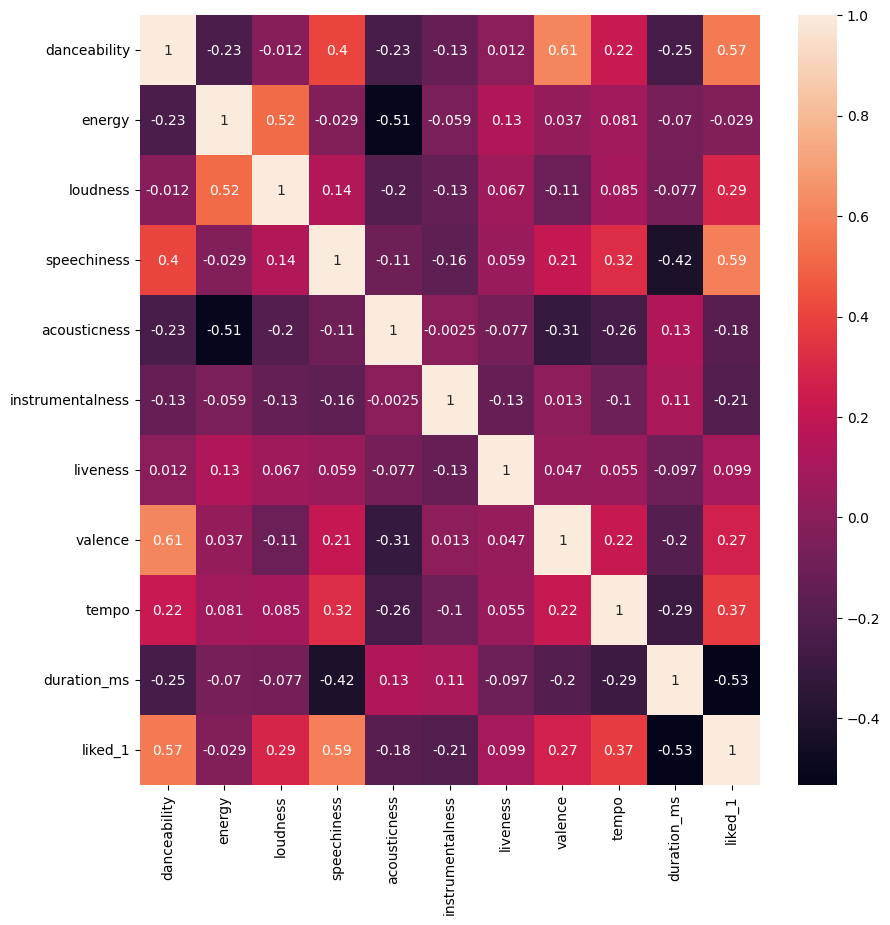

In [16]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

In [17]:
# Redundancias: correlaciones mayores a 0.8 en  la matriz
# Irrelevancia: correlaciones muy bajas con la variable objetivo (menor a 0.05)

**2. Balanceo de datos (Clasificación)**

<ipython-input-20-2949c855c1bb>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["liked"]).plot(kind="bar")


<Axes: xlabel='liked'>

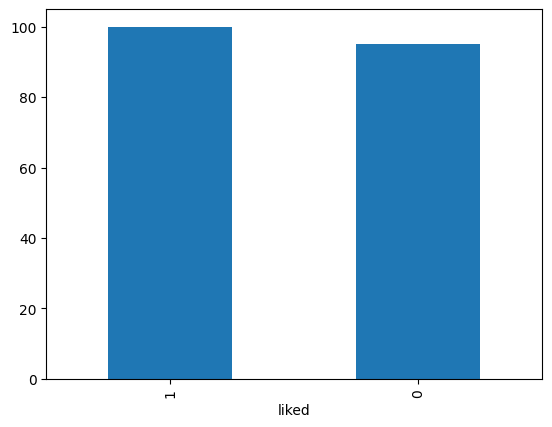

In [20]:
#Variable objetivo
pd.value_counts(data["liked"]).plot(kind="bar")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      195 non-null    float64 
 1   energy            195 non-null    float64 
 2   loudness          195 non-null    float64 
 3   speechiness       195 non-null    float64 
 4   acousticness      195 non-null    float64 
 5   instrumentalness  195 non-null    float64 
 6   liveness          195 non-null    float64 
 7   valence           195 non-null    float64 
 8   tempo             195 non-null    float64 
 9   duration_ms       195 non-null    float64 
 10  liked             195 non-null    category
dtypes: category(1), float64(10)
memory usage: 15.7 KB


In [23]:
from imblearn.over_sampling import SMOTE, SMOTENC

#sm = SMOTE( k_neighbors=2) para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) para variables predictoras categóricas

sm = SMOTENC(categorical_features=[0,1,3,4], k_neighbors=2) #se indican las variables predictoras categoricas
X= data.drop('liked', axis=1) #Predictoras
Y= data['liked'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo


<Axes: xlabel='liked'>

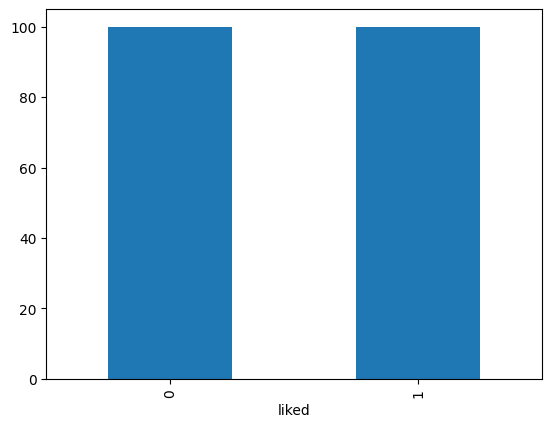

In [24]:
# Creamos un dataframe con los resultados
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['liked']=Y_bal
data['liked'].value_counts().plot(kind='bar')


In [25]:
#Guardamos los datos preparados
data_num.to_excel('./datos_numéricos.xlsx')

# **SE REALIZA DE NUEVO EL PROCESO CON LOS DATOS PREPARADOS**